<a href="https://colab.research.google.com/github/chiranjeev9292/The-Spark-Foundation-Tasks-GRIPJUNE/blob/main/Task_2_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Author : Chiranjeev Sharma**

## Task-2 Prediction using Unsupervised ML


## [GRIP @ The Spark Foundation](https://www.thesparksfoundationsingapore.org/)

### **Objective- In this task I tried to predict the optimum number of clusters and represent it visuallyusing K-means Clustering from the given ‘Iris’ dataset.**

Dataset URL:"https://bit.ly/3kXTdox"

### Import Libraries

In [2]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets

### Loading the Data

In [12]:
from google.colab import files
uploaded= files.upload()

Saving Iris.csv to Iris.csv


In [14]:
# Import Data
iris_df=pd.read_csv('Iris.csv')
print("The Data is Imported")

The Data is Imported


In [15]:
iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### Exploratory Data Analysis

In [17]:
# checking the information of Dataset
iris_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [18]:
# Checking shape of Dataset
iris_df.shape

(150, 6)

**We have 150 rows and 6 columns**

In [19]:
# Checking the presence of null values and Missing values
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**We do not have missing values in this dataset.**

In [20]:
# Checking the Data type of each Attribute
iris_df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [21]:
# Checking the Statistical details of Datasets
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [22]:
# Checking the co-relation b/w the Attributes
iris_df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


### Let's find the optimum number if KMean Clusteering and Determine the value of K

In [25]:
# Finding the optimum number of clusters for k-means classification

x= iris_df.iloc[:, [0,1,2,3]].values

# Within_cluster_sum_of_square (WCSS)
wcss = []

for i in range(1,10):
  kmeans = KMeans(n_clusters=i, init= 'k-means++', n_init=10, max_iter=300, random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)


<function matplotlib.pyplot.show>

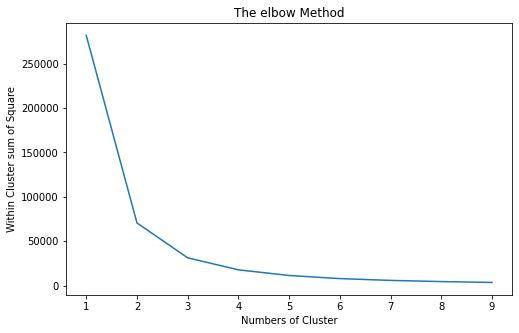

In [27]:
# Plotting the results onto a line graph, and `allowing us to observe 'The elbow'
plt.figure(figsize=(8,5))
plt.plot(range(1,10), wcss)
plt.title('The elbow Method')
plt.xlabel('Numbers of Cluster')
plt.ylabel('Within Cluster sum of Square')
plt.show

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

**from the above graph we can see that the elbow curve start at K=3, therefore, we choose the optimum number of clusters as 3.**

In [33]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters=3, init= 'k-means++', n_init=10, max_iter=300, random_state=0)

y_kmeans=kmeans.fit_predict(x)

### Visualization of Clusters

Text(0.5, 1.0, 'K-Means Clustering')

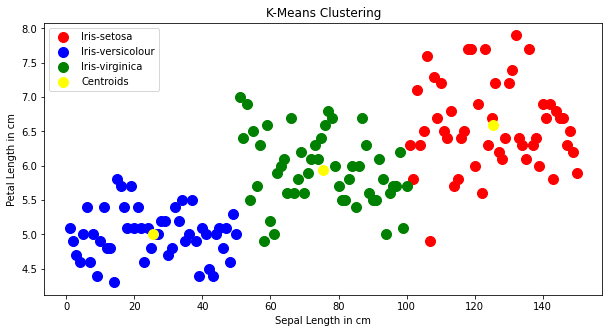

In [34]:
# Visualising the clusters - On the first two columns
plt.figure(figsize = (10,5))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.xlabel('Sepal Length in cm')
plt.ylabel('Petal Length in cm')
plt.title('K-Means Clustering')

From the figure we can conclude that: Red, green, blue are the clusters with their respective centroid marked with yellow colour.


**Thus, we can clearly conclude from the visual that the optimum number of clusters is 3.**

### **Thank You**